# Планирование рекламных кампаний

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br><br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br><br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Откроем файл с данными и изучим общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.shape

(16715, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Шаг 2. Подготовьте данные</b>

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns = df.columns.str.lower()

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Следовательно, можно заменить на Nan.

In [9]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce', downcast='float') # для оценки нужен числовой тип
df['user_score'] = df['user_score'].astype('float64')

Пропуски заполнять не будем, так как это исказит дальнейшее исследование. Заполним пропуски в столбце рейтинга. Так как информации о рейтинге нет, заполним RP (рейтинг ожидается).

In [11]:
df['rating'] = df['rating'].fillna('RP')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [13]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<b>Шаг 3. Проведите исследовательский анализ данных</b>

Text(0.5, 1.0, 'Количество выпускаемых игр по годам')

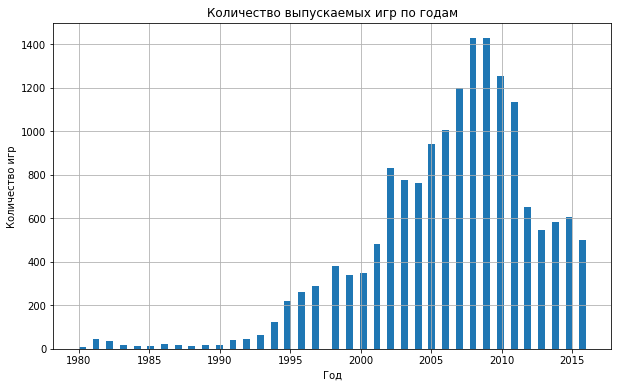

In [14]:
year_graph = df['year_of_release'].hist(bins = 74, figsize = (10,6))
year_graph.set_ylabel('Количество игр')
year_graph.set_xlabel('Год')
year_graph.set_title('Количество выпускаемых игр по годам')

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Добавь, пожалуйста, на все графики названия, подписи осей и легенду ((если рассматриваешь несколько наборов данных). Можешь посмотреть [тут](https://matplotlib.org/stable/tutorials/introductory/usage.html), как их добавлять
</div>

С 2001 года произошел резкий скачок по выпуску игр с пиком в 2008 и 2009 году.<br>
Данные за все периоды не важны, так как большинство платформ уже устарели. Будем рассматривать самые актуальные платформы за последние годы.<br>
Самыми актуальными данными можно считать продажи с 2011 года (за последние 5 лет по датафрейму).<br>
В сводную таблицу попали устаревшие платформы с минимальными показателями в 2011 и 2012 году, а также платформы, которые находятся на закате своей карьеры с минимальными показателями, начиная с 2014 года (год выхода нового поколения игровых платформ). Уберем эти показатели из таблицы. Будем считать, что минимальная планка в 5 миллионом продаж по миру является показателем успеха.<br>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Действительно, данных с 2011 года будет достаточно для прогноза на 2017 год

</div>


In [15]:
last_sales = df[df['year_of_release'] > 2010]
sales = last_sales.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
last_top_sales = sales[sales['all_sales'] >= 5]
last_top_sales

all_sales
platform year_of_release           
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2011                 26.18
         2012                 11.01
PC       2011                 35.03
         2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2011                156.78
         2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2011                 17.82
         2012                  7.69
PSV      2012                 16.19
         2013                 10.59
         2014                 11.90
         2015                  6.25
Wii      2011                 59.65
         2012                 21.71
         2013                  8.59
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
X360     2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

Как мы видим, рынок игровых платформ переживает не лучшие времена: у большинства платформ крайне сильно падают показатели продаж на 4-5 год. Это объясняется тем, что старые платформы заменяются платформами нового поколения (резкий обвал продаж у PS3 и резкий скачок продаж у PS4 в 2014 году), а также оттоком аудитории из-за внешних факторов: рост цен на игры, развитие мобильного гейминга итд.

Text(0.5, 0, 'Год релиза')

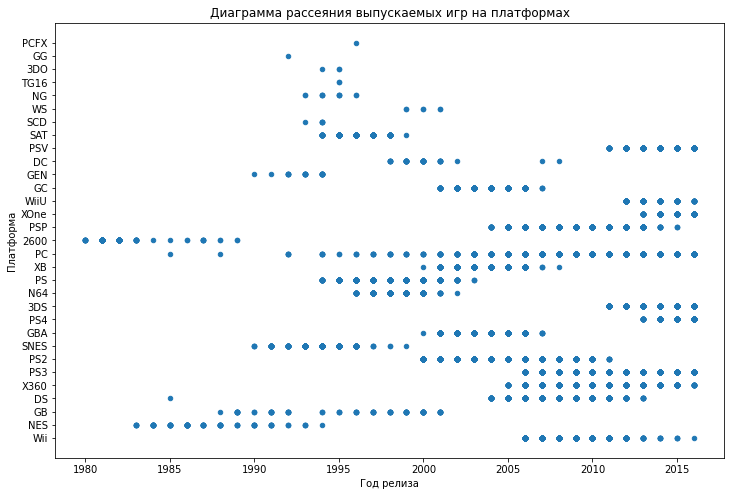

In [16]:
df.plot(x = 'year_of_release', y = 'platform', kind = 'scatter', figsize = (12,8), title = 'Диаграмма рассеяния выпускаемых игр на платформах');
plt.ylabel('Платформа')
plt.xlabel('Год релиза')

Как мы видим, средний срок жизни игровых платформ - 8-10 лет. Отметим, что для ПК игры выходят постоянно, следовательно, ПК является уникальной платформой, так как можно менять комплектующие.

In [17]:
top_platform = last_sales.groupby('platform')['all_sales'].sum().sort_values(ascending = False)
top_platform

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: all_sales, dtype: float64

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Ты правильно определил продолжительность жизни платформы
</div>

Топ-5 платформами за последние 5 лет оказались PS3, X360, PS4, 3DS и XOne. Для них и будем строить график распределения продаж по годам.

In [18]:
top_platform_list = last_sales.query('platform == "PS3" or platform == "X360" or platform == "PS4" or platform == "3DS" or platform == "XOne"')

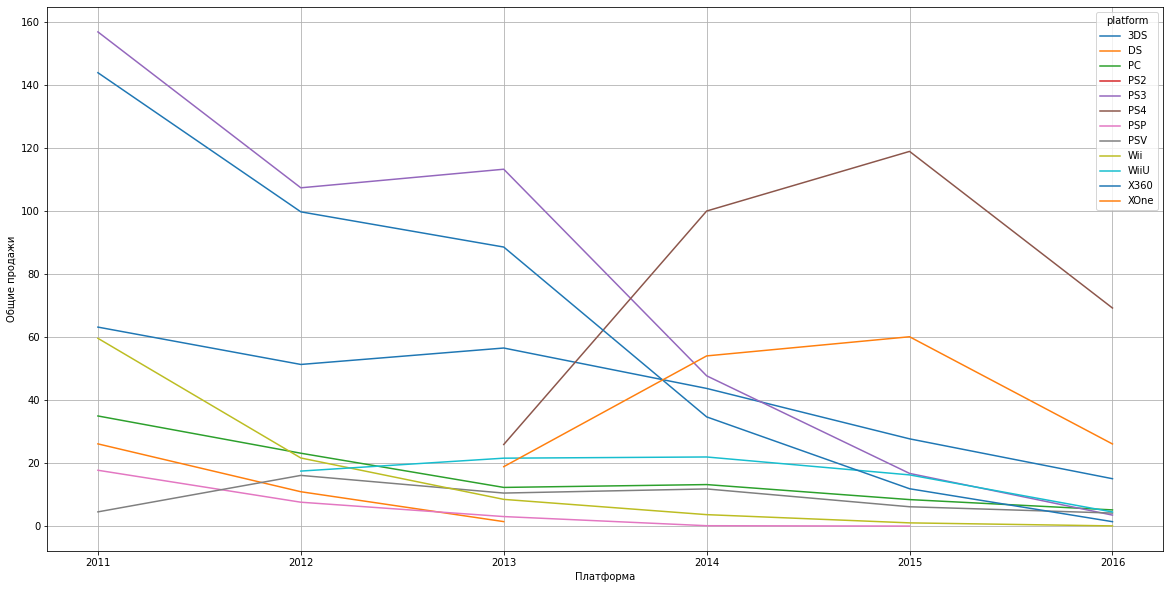

In [19]:
# строим сводную таблицу по продажам
platform_sales_by_year = last_sales.pivot_table(index="year_of_release", columns="platform", values="all_sales", aggfunc="sum")

# рисуем графики
platform_sales_by_year.plot(figsize=(20, 10), grid=True, ylabel = 'Общие продажи', xlabel = 'Платформа');

К 2016 году абсолютно все топовые платформы показали отрицательный рост по продажам. Если выбирать потенциально прибыльные платформы, то это PS4 и XOne, так как они единственные показывали рост с 2013 года.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Лучше рассмотреть все платформы за актуальный период, потому что в данных может быть какая-нибудь новая платформа с небольшими суммарными продажами, но хорошей динамикой.
</div>

(0.0, 2.8)

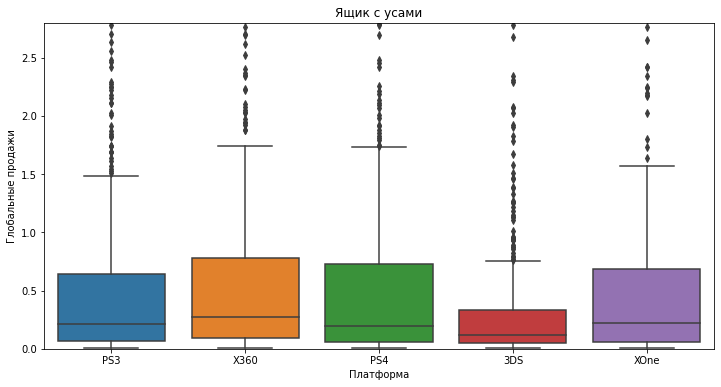

In [20]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'platform', y = 'all_sales', data = top_platform_list)
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0,2.8)

Исходя из графиков, можно заметить, что медиана у каждой платформы протекает по-разному, при этом медианные значения продаж низкие. <br>
Самые высокие продажи у X360, PS4, XOne и PS3. 3DS выглядит явным аутсайдером. <br>
Из-за того, что у платформ низкие медианные значения продаж, высокие продажи бестселлеров (коммерчески успешных игр) ящик с усами посчитал за выбросы.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Все верно 

</div>

In [21]:
platforms_list = ['PS3', 'X360', 'PS4', '3DS', 'XOne']

In [22]:
def other_platform_matrix(name_of_platform):
    platform = top_platform_list[top_platform_list['platform']==name_of_platform]
    scatter_user = platform.plot(kind = 'scatter', x='user_score', y='all_sales', title = name_of_platform, figsize = (10,6), xlabel = 'Оценка пользователей')
    scatter_critic = platform.plot(kind = 'scatter', x='critic_score', y='all_sales', title = name_of_platform, figsize = (10,6), xlabel = 'Оценка критиков')

    correl = platform['user_score'].corr(platform['all_sales'])
    critic_correl = platform['critic_score'].corr(platform['all_sales'])
    
    if correl > -0.1 and correl < 0.1:
        print('Отсутствие завимости между пользовательской оценкой и платформой', name_of_platform,'.','Коэффициент  Пирсона равен:', correl)
    if correl >= 0.1 and correl <= 0.3:
        print('Cлабая завимость между пользовательской оценкой и платформой', name_of_platform,'.','Коэффициент Пирсона равен:', correl)
        
    if critic_correl > -0.1 and critic_correl < 0.1:
        print('Отсутствие завимости между критик оценкой и платформой', name_of_platform,'.','Коэффициент Пирсона равен:', critic_correl)
        print('\n')
    if critic_correl >= 0.1 and critic_correl <= 0.3:
        print('Cлабая завимость между критик оценкой и платформой', name_of_platform,'.','Коэффициент Пирсона равен:', critic_correl)
        print('\n')
    if critic_correl > 0.3 and critic_correl < 0.5:
        print('Умеренная завимость между критик оценкой и платформой', name_of_platform,'.','Коэффициент Пирсона равен:', critic_correl)
        print('\n')

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Лучше, наверное рассмотреть в фунции все варианты коэффициента (от -1 до 1). Для correl, например, рассматривается только от -0,1 до 0,3
</div>

Отсутствие завимости между пользовательской оценкой и платформой PS3 . Коэффициент  Пирсона равен: 0.014089348812579703
Умеренная завимость между критик оценкой и платформой PS3 . Коэффициент Пирсона равен: 0.38011114718290767


Отсутствие завимости между пользовательской оценкой и платформой X360 . Коэффициент  Пирсона равен: 0.038918176950311405
Умеренная завимость между критик оценкой и платформой X360 . Коэффициент Пирсона равен: 0.3912533245484558


Отсутствие завимости между пользовательской оценкой и платформой PS4 . Коэффициент  Пирсона равен: -0.031957109005188264
Умеренная завимость между критик оценкой и платформой PS4 . Коэффициент Пирсона равен: 0.40656790206178095


Cлабая завимость между пользовательской оценкой и платформой 3DS . Коэффициент Пирсона равен: 0.2220784080796993
Умеренная завимость между критик оценкой и платформой 3DS . Коэффициент Пирсона равен: 0.3487397305984834


Отсутствие завимости между пользовательской оценкой и платформой XOne . Коэффициент  Пирсо

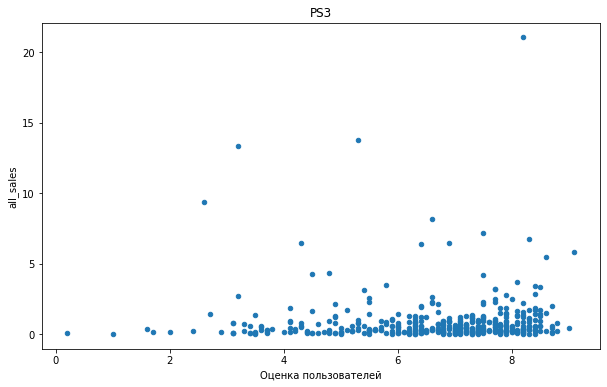

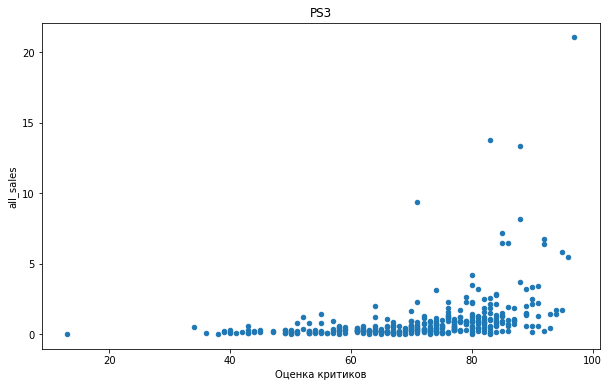

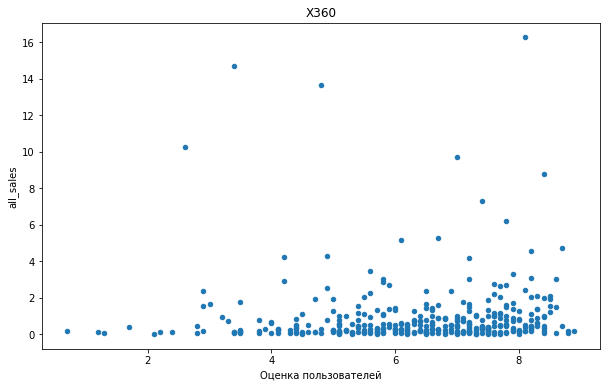

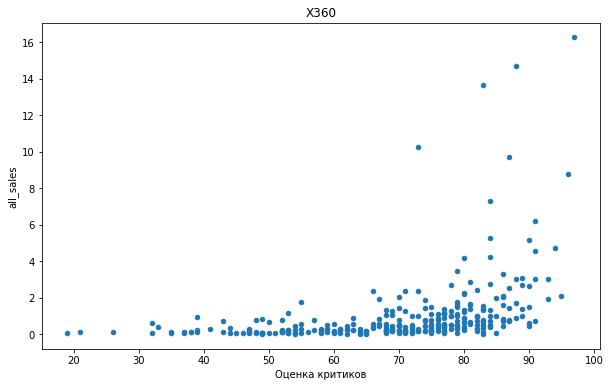

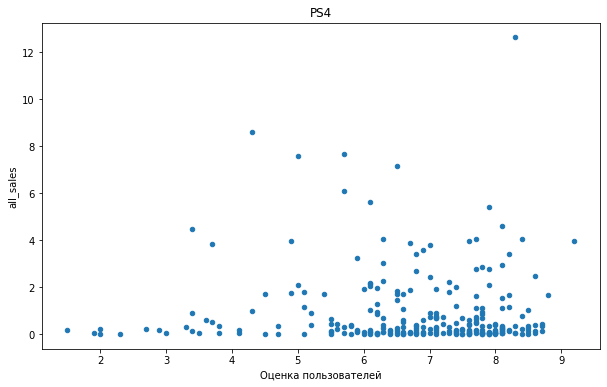

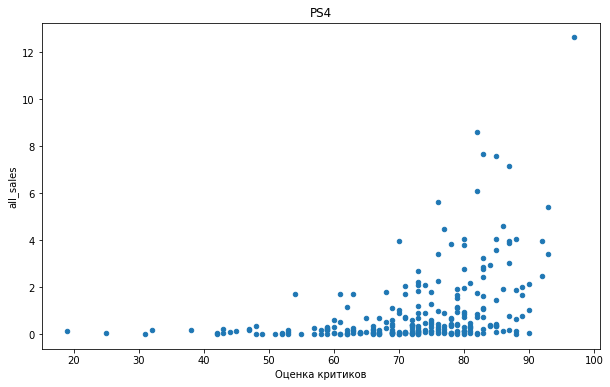

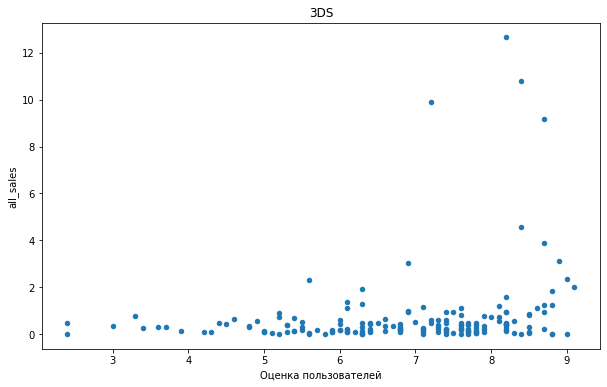

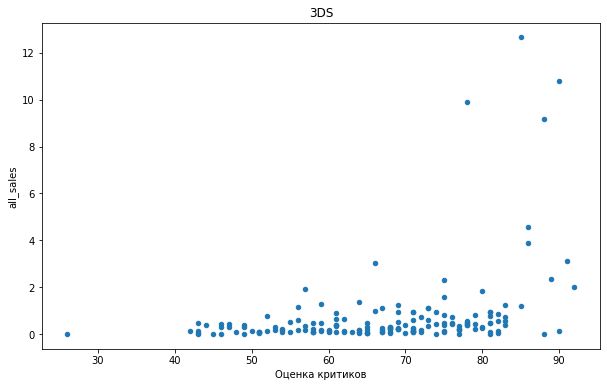

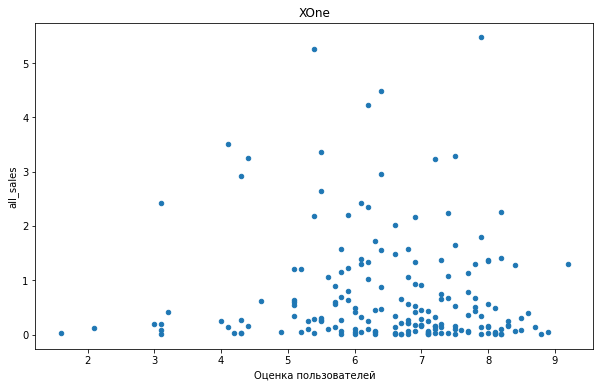

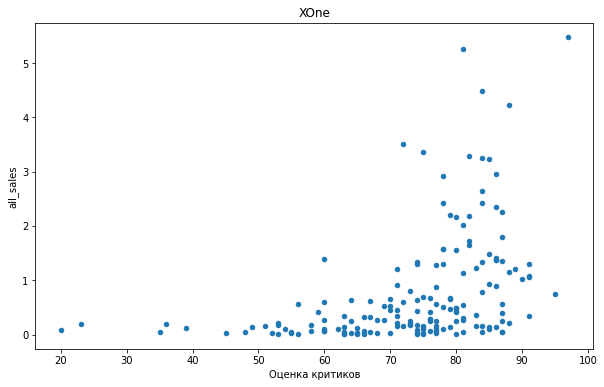

In [23]:
for platform in platforms_list:
    other_platform_matrix(platform)

Насколько мы видим, пользовательские оценки никак на продажи игр не влияют. У платформы 3DS показал слабую зависимость <br>
Оценки критиков, наоборот, умеренно влияют на продажи игр. <br>
Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Ты хорошо справился с определением зависимости продаж от оценок критиков и пользователей
</div>


In [24]:
top_genre = top_platform_list.pivot_table(index='genre', values='all_sales',aggfunc=['count', 'sum','mean'])
top_genre.columns = ['Кол-во игр', 'Общая прибыль', 'Средняя прибыль']
top_genre.sort_values(by='Общая прибыль', ascending=False)

,Кол-во игр,Общая прибыль,Средняя прибыль
genre,,,
Action,793,460.76,0.581034
Shooter,243,368.53,1.516584
Sports,271,206.81,0.763137
Role-Playing,251,185.94,0.740797
Racing,123,72.35,0.588211
Misc,196,70.65,0.360459
Platform,71,57.33,0.807465
Fighting,118,54.57,0.462458
Simulation,70,35.28,0.504000


Самыми прибыльными жанрами являются экшн и шутеры, что достаточно ожидаемо. Самыми не прибыльными являются паззлы и стратегии. При этом средняя прибыль у шутеров выше всех.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
С анализом жанров все замечательно
</div>


<b>Шаг 4. Составьте портрет пользователя каждого региона</b>

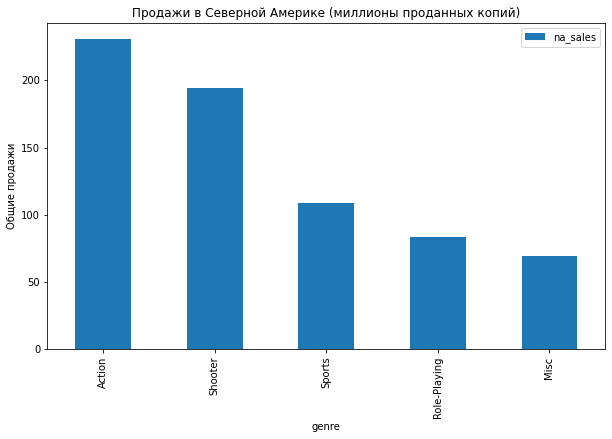

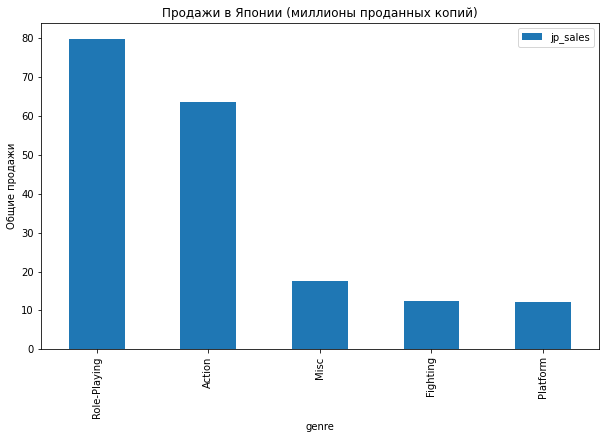

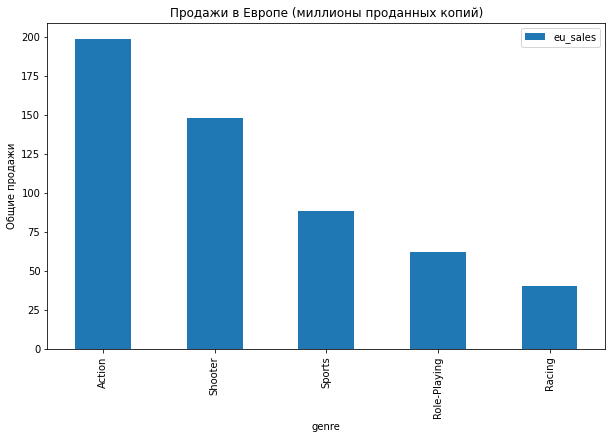

In [25]:
na_genre = last_sales.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending=False).head()
jp_genre = last_sales.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()
eu_genre = last_sales.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending=False).head()

na_genre.plot(kind = 'bar', figsize = (10,6), title = 'Продажи в Северной Америке (миллионы проданных копий)', ylabel = 'Общие продажи');
jp_genre.plot(kind = 'bar', figsize = (10,6), title = 'Продажи в Японии (миллионы проданных копий)', ylabel = 'Общие продажи');
eu_genre.plot(kind = 'bar', figsize = (10,6), title = 'Продажи в Европе (миллионы проданных копий)', ylabel = 'Общие продажи');

В Европе и Северной Америке картина по продажам примерно одинаковая (лидируют жанры экшн, шутер и спорт). В Японии же лидирует жанр ролевых игр.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Все верно 

</div>

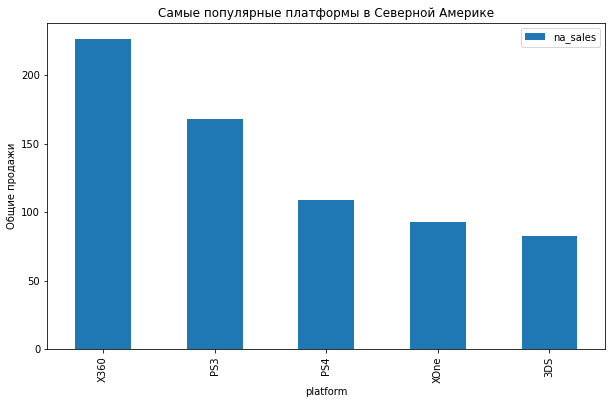

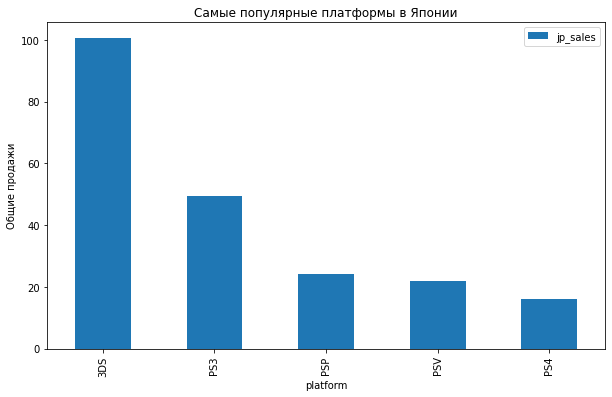

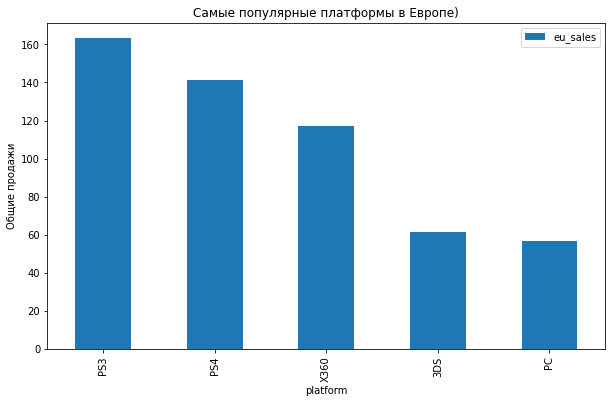

In [26]:
na_genre = last_sales.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending=False).head()
jp_genre = last_sales.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()
eu_genre = last_sales.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending=False).head()

na_genre.plot(kind = 'bar', figsize = (10,6), title = 'Самые популярные платформы в Северной Америке', ylabel = 'Общие продажи');
jp_genre.plot(kind = 'bar', figsize = (10,6), title = 'Самые популярные платформы в Японии', ylabel = 'Общие продажи');
eu_genre.plot(kind = 'bar', figsize = (10,6), title = 'Самые популярные платформы в Европе)', ylabel = 'Общие продажи');

Самой популярной платформой у пользователей из Северной Америки является X360. Это платформа от американской компании Microsoft и в целом по статистике в Северной Америке больше любят серию платформ XBox. График совпадает со статистикой.<br>
Самой популярной платформой у пользователей из Японии является 3DS. Это творение от японской компании Nintendo. Также на эту платформу выпускают очень много ролевых игр, что совпадает со стататиской по популярности жанров. Также стоит отметить, что пользователи из Японии предпочитают платформы только от японский производителей.<br>
Самой популярной платформой у пользователей из Европы является PS3. При этом показатели более новой модели PS4 совсем немного отстают от показателей PS3. Также совсем недалеко находится и X360. В целом, европейцы предпочитают платформы и от Sony, и от Microsoft.

In [27]:
esrb = last_sales.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by = 'na_sales',ascending=False)
esrb     

,eu_sales,jp_sales,na_sales
rating,,,
M,250.26,26.14,308.45
E,141.73,36.68,170.17
RP,116.64,138.21,123.69
E10+,78.00,11.23,117.72
T,83.16,33.39,109.31
EC,0.00,0.00,0.42


Самый популярный рейтинг игр в Европе и Северной Америке - это "M" (для взрослых). Следом идет "E" (для всех). <br>
В Японии самый популярный с большим отрывом рейтинг - это "RP" (ожидается). Посмотрим, какие платформы и жанры чаще всего ожидают рейтинг от ESRB.

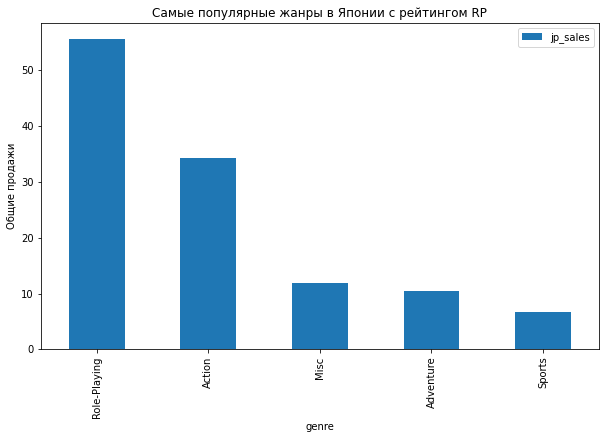

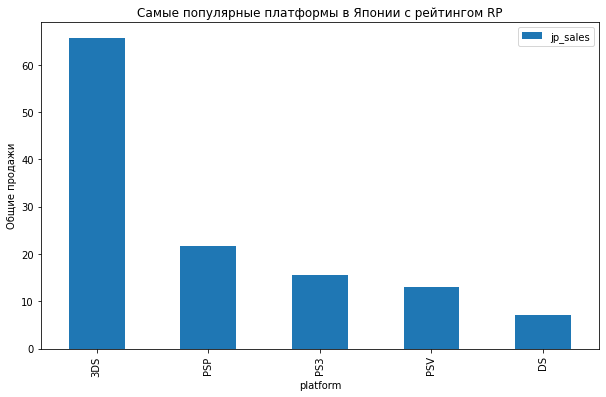

In [28]:
rp = last_sales[last_sales['rating'] == 'RP']
rp_genre = rp.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()
rp_platform = rp.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()
rp_genre.plot(kind = 'bar', figsize = (10,6), title = 'Самые популярные жанры в Японии с рейтингом RP', ylabel = 'Общие продажи');
rp_platform.plot(kind = 'bar', figsize = (10,6), title = 'Самые популярные платформы в Японии с рейтингом RP', ylabel = 'Общие продажи');

Следовательно, игры, выходящие на портативных платформах, реже получают или дольше ожидают сертификацию от ESRB. Так как в Японии больше всего геймеров, предпочитающих именно портативные платформы, больше всего продаж приносят игры без сертификации. Самый популярный жанр - Role-Playing.

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Думаю, стоит добавить новую категорию для игр без возрастного рейтинга (например "undefined"). Это позволит сделать дополнительные выводы
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Здорово, что дополнил исследование! Хорошо, что постарался разобраться в причинах популярности игр без рейтинга ESRB в Японии.
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Ты хорошо справился с составлением портретов пользователей
</div>

<b>Шаг 5. Проверьте гипотезы</b>

In [29]:
from scipy import stats as st

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
    Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
</div>

Сформулируем нулевые гипотезы:

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются; <br>

Для проверки двух дисперсий можно использовать Тест Левене

In [30]:
from scipy.stats import levene #(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

xbox_sample = df[df['platform']=="XOne"]['user_score'].dropna()
pc_sample = df[df['platform']=="PC"]['user_score'].dropna()

stat, p = levene(xbox_sample, pc_sample)
p

0.26939519863850653

Значение 0.26 по Тесту Левене достаточно большое. Будем считать, что выборки имеют равные дисперсии.

In [31]:
alpha = 0.05

results = st.ttest_ind(xbox_sample, pc_sample, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.389642973077905e-05
Отвергаем нулевую гипотезу


Следовательно, средние пользовательские рейтинги платформ Xbox One и PC различаются

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Ты правильно сформулировал гипотезы и выбрал подходящий способ проверки
</div>


Сформулируем нулевые гипотезы:

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые; <br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются;

In [32]:
action_sample = df[df['genre']=="Action"]['user_score'].dropna()
sports_sample = df[df['genre']=="Sports"]['user_score'].dropna()

stat, p = levene(action_sample, sports_sample)
p

0.00017366415501989647

Крайне низкое значение Теста Левене. Будем считать, что дисперсии двух выборок различаются.

In [33]:
alpha = 0.05

results = st.ttest_ind(action_sample, sports_sample, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11483815981646321
Не получилось отвергнуть нулевую гипотезу


11% - вероятность ошибки первого рода. Отвергнуть нулевую гипотезу не получилось.

<b>Шаг 6. Общий вывод</b>

1. С 2001 количество вышедших игр стремильно начало расти, с пиком в 2008-2009 году. Однако, с 2010 года тенцендия пошла на спад; <br>
2. Почти у каждой платформы сильно падают продажи на 4-5 год; <br>
3. Топ-5 платформами за последние 5 лет оказались PS3, X360, PS4, 3DS и XOne; <br>
4. Средний срок жизни игровых платформ - 8-10 лет; <br>
5. Если выбирать потенциально прибыльные платформы, то это PS4 и XOne; <br>
6. Пользовательские оценки никак на продажи игр не влияют. Оценки критиков, наоборот, умеренно влияют на продажи игр; <br>
7. В Европе и Северной Америке картина по продажам примерно одинаковая (лидируют жанры экшн, шутер и спорт). В Японии же лидирует жанр ролевых игр; <br>
8. Самая популярная платформа в Северной Америке - X360, в Японии - 3DS, в Европе - PS3; <br>
9. Отвергли нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC совпадают; <br>
10. Не отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports совпадают; <br>